In [1]:
import pyomo.environ as pyo

In [40]:
import numpy as np
import pandas as pd



In [41]:
data = pd.read_csv("DebrisFlow.txt",sep ='\t',header = None)

In [77]:
model = pyo.ConcreteModel()

In [78]:
M = [max( abs(data.iloc[i][1] - 0.29*data.iloc[i][0]-25) , abs(data.iloc[i][1] - 0.29*data.iloc[i][0]+94),
        abs(data.iloc[i][1]-25) , abs(data.iloc[i][1] +94)) for i in range(len(data))]

In [79]:
I = np.arange(len(data)) +1

In [80]:
model.Iset = pyo.Set(initialize=I)

In [81]:
def rule_x(model,i):
    return data.iloc[i-1][0]
def rule_y(model,i):
    return data.iloc[i-1][1]

In [82]:
B = np.arange(4)+1

In [83]:
model.Bset = pyo.Set(initialize=B)
model.B = pyo.Param(initialize=len(B))

In [84]:
model.X = pyo.Param(model.Iset,initialize=rule_x)

In [85]:
model.Y = pyo.Param(model.Iset,initialize=rule_y)

In [86]:
model.c = pyo.Var(model.Bset,domain=pyo.Reals,bounds=(0,0.3))

In [87]:
model.d = pyo.Var(model.Bset,domain=pyo.Reals,bounds=(-94,25))

In [88]:
model.eps = pyo.Var(model.Iset,domain = pyo.NonNegativeReals)

In [89]:
model.delta = pyo.Var(model.Iset,model.Bset,domain = pyo.Binary)

In [90]:
def M_rule(model,i):
    return M[i-1]

In [91]:
model.M = pyo.Param(model.Iset,initialize=M_rule)

In [92]:
def rule_const1(model,i,b):
    return model.Y[i] - model.c[b]*model.X[i] - model.d[b] <= model.eps[i] + model.M[i]*(1-model.delta[i,b])

In [93]:
model.const1 = pyo.Constraint(model.Iset,model.Bset,rule = rule_const1)

In [94]:
def rule_const2(model,i,b):
    return -1*model.Y[i] + model.c[b]*model.X[i] + model.d[b] <= model.eps[i] + model.M[i]*(1-model.delta[i,b])

In [95]:
model.const2 = pyo.Constraint(model.Iset,model.Bset,rule=rule_const2)

In [96]:
def rule_const3(model,i):
    return sum(model.delta[i,b] for b in model.Bset) == 1

In [97]:
model.const3 = pyo.Constraint(model.Iset,rule=rule_const3)

In [98]:
def rule_obj(model):
    return sum(model.eps[i] for i in model.Iset)

In [99]:
model.obj = pyo.Objective(rule=rule_obj,sense = pyo.minimize)

In [100]:
solver = pyo.SolverFactory('glpk')

In [101]:
opt = {'tmlim':300}

In [102]:
result = solver.solve(model, options = opt)

In [103]:
c = [pyo.value(model.c[i]) for i in model.Bset]

In [104]:
d =[pyo.value(model.d[i]) for i in model.Bset]

In [105]:
lines = [[cc,dd] for cc,dd in zip(c,d)]

In [106]:
import matplotlib.pyplot as plt


In [107]:
cls = []
for i in range(1,len(data)+1):
    for j in range(1,len(B)+1):
        if pyo.value(model.delta[i,j])==1:
            cls.append(j)
    

In [108]:
c_map={1:'blue',2:'orange',3:'green',4:'red'}

In [109]:
colors =[c_map[i] for i in cls]

# 4 clusters

In [110]:
print(result)


Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 397
  Number of variables: 229
  Number of nonzeros: 1585
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: feasible
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 300.87013125419617
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



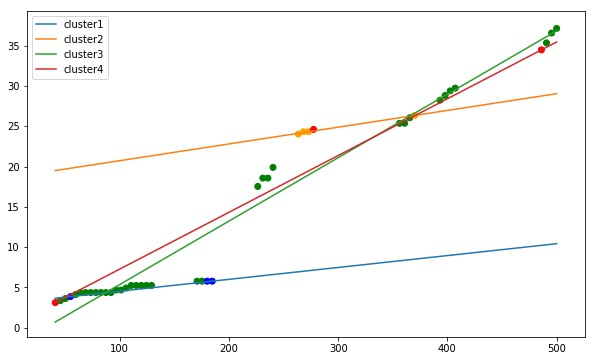

In [111]:
plt.figure(figsize=(10,6))
i=1
for cc,dd in zip(c,d):
    plt.plot(data[0],cc*data[0]+dd,label=f"cluster{i}")
    i+=1
plt.legend()  
plt.scatter(data[0],data[1],c=colors)


plt.show()


# 3 clusters

In [75]:
print(result)


Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 309
  Number of variables: 183
  Number of nonzeros: 1189
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: feasible
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 300.7115650177002
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



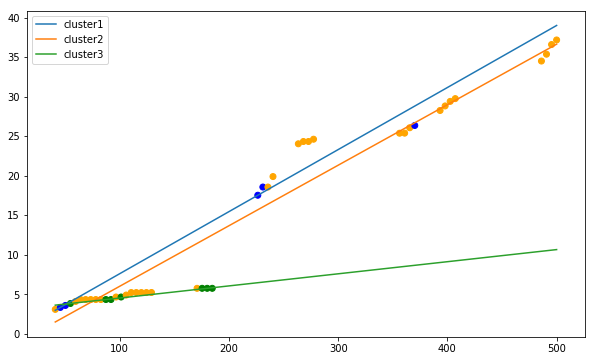

In [76]:
plt.figure(figsize=(10,6))
i=1
for cc,dd in zip(c,d):
    plt.plot(data[0],cc*data[0]+dd,label=f"cluster{i}")
    i+=1
plt.legend()  
plt.scatter(data[0],data[1],c=colors)


plt.show()


# 2 clusters

In [30]:
print(result)


Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 221
  Number of variables: 137
  Number of nonzeros: 793
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: feasible
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 600.7344808578491
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



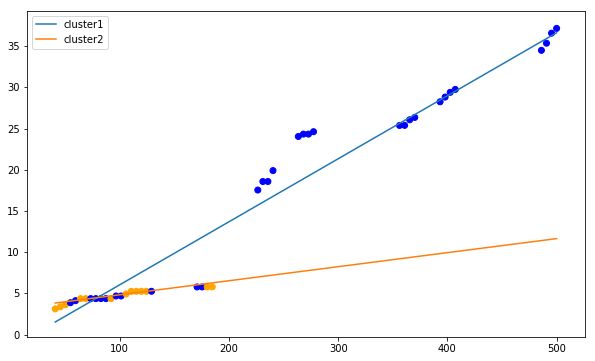

In [39]:
plt.figure(figsize=(10,6))
i=1
for cc,dd in zip(c,d):
    plt.plot(data[0],cc*data[0]+dd,label=f"cluster{i}")
    i+=1
plt.legend()  
plt.scatter(data[0],data[1],c=colors)


plt.show()
